In [ ]:


import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn import tree                                    # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                              # for accessing tree information
from sklearn import metrics                                 # measures to check our models
from sklearn.tree import export_graphviz                    # graphical visualization of trees
from sklearn.preprocessing import StandardScaler            # standardize variables to mean of 0.0 and variance of 1.0

from sklearn.model_selection import cross_val_score         # cross validation methods
from sklearn.tree import DecisionTreeRegressor              # decision tree method
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor      # tree-based gradient boosting

import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from subprocess import check_call
# import geostatspy.GSLIB as GSLIB  


In [ ]:
from google.colab import drive #comment out this line if you are using Colab
drive.mount("/content/gdrive/") 

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import os
# main_path = "/content/gdrive/My Drive/ML_Project_data/Data_2/"
main_path = "/content/gdrive/My Drive/Colab Notebooks/Intro to DS/"
os.listdir(main_path)

['Group_19_data_cleaned.csv',
 'models',
 'Group_19_presentation_of_the_test_results.ipynb',
 'Group_19_Bi_directional_elimination.ipynb',
 'Group_19_first_variable_selection1.ipynb',
 'Group_19_first_model_ash.ipynb',
 'A.ipyb']

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
# importing the csv into DataFrame using Pandas
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Intro to DS//Group_19_data_cleaned.csv",index_col=None,encoding= 'unicode_escape',parse_dates=[0])

df.head(2)

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1
1,1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1


In [ ]:
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1


## <b> Data Preparation - Feature Engineering </font>

In [ ]:
df.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*df.columns]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_Speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_Point_Temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   int64  
 13  Functioning_Day        8760 non-null   int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 958.2+ 

In [ ]:
df.Date = pd.to_datetime(df.Date, format="%Y/%m/%d")

In [ ]:
df.insert(1,"Day", df.Date.dt.day)
df.insert(2, "Month", df.Date.dt.month)
df.insert(3, "Year", df.Date.dt.year)

In [ ]:
df.insert(3, 'WeekDay',df["Date"].dt.day_name())

In [ ]:
df.Year = df.Year.map({2017:0, 2018:1})

In [ ]:
df.Seasons = df.Seasons.map({"Winter":1, 'Autumn':2, 'Spring':3, 'Summer':4})

In [ ]:
df.insert(2, 'label_day_night', df['Hour'].apply(lambda x : 0 if (x<7) else( 1)))

In [ ]:
df["Working_Day"] = 1
df.loc[(df.WeekDay=="Saturday")|(df.WeekDay=="Sunday"), "Working_Day"] = 0

In [ ]:
df.Humidity[df.Humidity==0] = df.Humidity.mean()

In [ ]:
categoryVariableList = ["WeekDay"]
for var in categoryVariableList:
    df[var] = df[var].astype("category")

In [ ]:
for col in categoryVariableList:
    df_dummies_col = pd.get_dummies(df[col])
    
    df = pd.concat([df, df_dummies_col],axis=1)
    
    df.drop(col, axis=1, inplace=True)

In [ ]:
df.columns

Index(['Date', 'Day', 'label_day_night', 'Month', 'Year', 'Rented_Bike_Count',
       'Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Working_Day', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [ ]:
columns = df.columns.tolist()
columns.append(columns.pop(5))
df = df[columns]

In [ ]:
df.drop("Date",axis=1, inplace=True)

In [ ]:
numerical_feature = ["Temperature","Humidity","Rainfall",
                     "Visibility","Dew_Point_Temperature",
                     'Wind_Speed','Solar_Radiation',"Snowfall"]

scale = StandardScaler()
df[numerical_feature] = scale.fit_transform(df[numerical_feature])

In [ ]:
def plot_corr(dataframe,size=10):                           # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the decision tree prediction 
    cmap = plt.cm.inferno
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), # set up the mesh
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])      # predict with our trained model over the mesh
    Z = Z.reshape(xx.shape)
    plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="white")
    im = plt.imshow(Z,interpolation = None,aspect = "auto",extent = [x_min,x_max,y_min,y_max], vmin = z_min, vmax = z_max,cmap = cmap)
    plt.title(title)                                       # add the labels
    plt.xlabel(xfeature.name); plt.ylabel(yfeature.name)
    plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max])
    cbar = plt.colorbar(im, orientation = 'vertical')      # add the color bar
    cbar.set_label(response.name, rotation=270, labelpad=20)
    return Z

def check_model(model,xfeature,yfeature,response,title):    # plots the estimated vs. the actual  
    predict_train = model.predict(np.c_[xfeature,yfeature])
    plt.scatter(response,predict_train,s=None, c='red',marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, edgecolors="black")
    plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
    plt.xlim(0,7000); plt.ylim(0,7000)
    plt.arrow(0,0,7000,7000,width=0.02,color='black',head_length=0.0,head_width=0.0)
    MSE = metrics.mean_squared_error(response,predict_train)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    print('Mean Squared Error on Training = ', round(MSE,2),', Variance Explained =', round(Var_Explained,2),'Cor =', round(cor,2))

In [ ]:
X = df.drop(['Rented_Bike_Count'],axis=1)
y = df['Rented_Bike_Count']

In [ ]:
# useful_features = ['Functioning_Day',
#  'Holiday',
#  'Hour',
#  'Humidity',
#  'Monday',
#  'Month',
#  'Rainfall',
#  'Solar_Radiation',
#  'Sunday',
#  'Temperature',
#  'Thursday',
#  'Visibility',
#  'Year',
#  'label_day_night']

In [ ]:
useful_features = [
 'Hour',
 'Temperature',
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[useful_features],
                                                  df.Rented_Bike_Count,
                                                  test_size=0.2,
                                                  random_state=2)

In [ ]:
X_train

,Hour,Temperature
6241,1,0.922383
3424,16,0.520513
6930,18,0.947500
6918,6,0.679586
60,12,-0.593004
...,...,...
1099,19,-0.710216
2514,18,-0.207878
6637,13,1.006106
2575,7,-0.618121


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.25,random_state =2)

In [ ]:
# y_train=y_train.to_numpy()
# y_test=y_test.to_numpy()

In [ ]:
predictors = X_train.copy()       # make a new DataFrame with predictor features for training
response = y_train.copy()            # make a new DataFrame with responses features for training
predictors_test = X_test.copy() # make a new DataFrame with predictor features for testing
response_test = y_test.copy()  # make a new DataFrame with responses for testing

In [ ]:
predictors

,Hour,Temperature
252,12,-1.513957
6736,16,1.031223
4104,0,0.202365
2665,1,-0.944641
4777,1,0.679586
...,...,...
3956,20,0.713076
1728,0,-1.656286
4775,23,0.738193
4240,16,1.349371


Complete of 20:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  

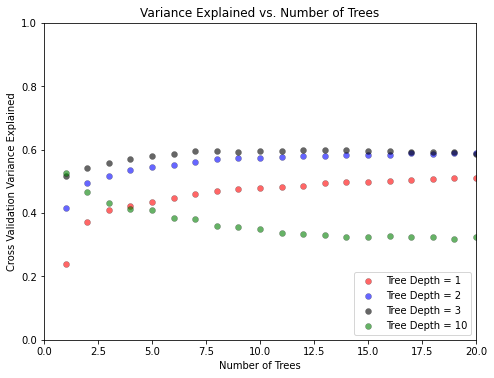

In [ ]:
num_trees = np.linspace(1,20,20)
estimators=[]
max_features = 2
boosting_models1 = []; boosting_models2 = []; boosting_models3 = []; boosting_models4 = []
score1 = []; score2 = []; score3 = []; score4 = [] 

params1 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 1,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params2 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params3 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 3,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params4 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 10,                                        # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees in our random forest
    boosting_models1.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params1))
    boosting_models1[index-1].fit(X = predictors, y = response)
    score1.append(boosting_models1[index-1].score(X = predictors_test, y = response_test))
    estimators.append((str('model1_'+str(int(num_tree))),boosting_models1[index-1]))

    boosting_models2.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params2))
    boosting_models2[index-1].fit(X = predictors, y = response)
    score2.append(boosting_models2[index-1].score(X = predictors_test, y = response_test)) 
    estimators.append((str('model2_'+str(int(num_tree))),boosting_models2[index-1]))


    boosting_models3.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params3))
    boosting_models3[index-1].fit(X = predictors, y = response)
    score3.append(boosting_models3[index-1].score(X = predictors_test, y = response_test)) 
    estimators.append((str('model3_'+str(int(num_tree))),boosting_models3[index-1]))

    boosting_models4.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params4))
    boosting_models4[index-1].fit(X = predictors, y = response)
    score4.append(boosting_models4[index-1].score(X = predictors_test, y = response_test)) 
    estimators.append((str('model4_'+str(int(num_tree))),boosting_models4[index-1]))

    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplot(111)                                            # plot jackknife results for all cases
plt.scatter(num_trees,score1,s=None, c='red', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Tree Depth = 1")
plt.scatter(num_trees,score2,s=None, c='blue', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Tree Depth = 2")
plt.scatter(num_trees,score3,s=None, c='black', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Tree Depth = 3")
plt.scatter(num_trees,score4,s=None, c='green', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Tree Depth = 10")

plt.title('Variance Explained vs. Number of Trees'); plt.xlabel('Number of Trees'); plt.ylabel('Cross Validation Variance Explained')
plt.xlim(0,20); plt.ylim(0,1.0); plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)
plt.show()

#### <font color='Blue'> Looking at the above combinations of 20 trees with four depths as 1,2,3,10 we have 80 models in total.

In [ ]:
estimators

[('model1_1',
  GradientBoostingRegressor(criterion='mse', learning_rate=1, loss='ls',
                            max_depth=1, n_estimators=1)),
 ('model2_1',
  GradientBoostingRegressor(criterion='mse', learning_rate=1, loss='ls',
                            max_depth=2, n_estimators=1)),
 ('model3_1',
  GradientBoostingRegressor(criterion='mse', learning_rate=1, loss='ls',
                            n_estimators=1)),
 ('model4_1',
  GradientBoostingRegressor(criterion='mse', learning_rate=1, loss='ls',
                            max_depth=10, n_estimators=1)),
 ('model1_2',
  GradientBoostingRegressor(criterion='mse', learning_rate=1, loss='ls',
                            max_depth=1, n_estimators=2)),
 ('model2_2',
  GradientBoostingRegressor(criterion='mse', learning_rate=1, loss='ls',
                            max_depth=2, n_estimators=2)),
 ('model3_2',
  GradientBoostingRegressor(criterion='mse', learning_rate=1, loss='ls',
                            n_estimators=2)),
 ('

In [ ]:

from sklearn.ensemble import VotingRegressor
voting = VotingRegressor(estimators=estimators)
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('model1_1',
                             GradientBoostingRegressor(criterion='mse',
                                                       learning_rate=1,
                                                       loss='ls', max_depth=1,
                                                       n_estimators=1)),
                            ('model2_1',
                             GradientBoostingRegressor(criterion='mse',
                                                       learning_rate=1,
                                                       loss='ls', max_depth=2,
                                                       n_estimators=1)),
                            ('model3_1',
                             GradientBoostingRegressor(criterion='mse',
                                                       learning_rate=1,
                                                       loss='ls',
                                                       n_estimators=1)),
  

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    # print(y_test_pred)
    # print(y_test.to_numpy())
    print("TRAINIG RESULTS: \n===============================")
    print(f"ACCURACY SCORE:\n{r2_score(y_train, y_train_pred):.4f}")
    from sklearn.metrics import mean_squared_error,mean_absolute_error
    print('MAE  is : {:.2f}'.format((mean_absolute_error(y_train,y_train_pred))))
    print('RMSE is : {:.2f}'.format(np.sqrt(mean_squared_error(y_train,y_train_pred))))

    print("TESTING RESULTS: \n===============================")
    print(f"ACCURACY SCORE:\n{r2_score(y_test, y_test_pred):.4f}")
    print('MAE  is : {:.2f}'.format((mean_absolute_error(y_test,y_test_pred))))
    print('RMSE is : {:.2f}'.format(np.sqrt(mean_squared_error(y_test,y_test_pred))))


In [ ]:

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE:
0.7244
MAE  is : 223.21
RMSE is : 327.82
TESTING RESULTS: 
ACCURACY SCORE:
0.5894
MAE  is : 267.63
RMSE is : 398.84
